## Creating an Similar Image Search Notebook in Python

### This is based on the blogpost mentioned below:
https://www.pyimagesearch.com/2014/01/27/hobbits-and-histograms-a-how-to-guide-to-building-your-first-image-search-engine-in-python/

### The implementation is almost same, just the processing of images, calling images and the way output is is shown is different

In [16]:
# Necessary libraries
import cv2
import numpy as np

In [98]:
import matplotlib.pyplot as plt

### Using the same class for RGBHistogram

In [2]:
class RGBHistogram:
    def __init__(self, bins):
        # store the number of bins the histogram will use
        self.bins = bins
 
    def describe(self, image):
        # compute a 3D histogram in the RGB colorspace,
        # then normalize the histogram so that images
        # with the same content, but either scaled larger
        # or smaller will have (roughly) the same histogram
        hist = cv2.calcHist([image], [0, 1, 2],
            None, self.bins, [0, 256, 0, 256, 0, 256])
 
        hist = cv2.normalize(hist,hist)

        # return out 3D histogram as a flattened array
        return hist.flatten()

In [3]:
import os

### All the images inside the folder:

In [4]:
workingpath='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 2\\Image Search\\image_search'
lis2=os.listdir(workingpath)
lis2

['minions1.jpg',
 'minions2.jpg',
 'minions3.jpg',
 'minions4.jpg',
 'pandagreen1.jpg',
 'pandagreen2.jpg',
 'pandagreen3.jpg',
 'pandagreen4.jpg',
 'pandagreen5.jpg',
 'rainbow1.jpg',
 'rainbow2.jpg',
 'rainbow3.jpg',
 'rainbow4.jpg',
 'white_walker1.jpg',
 'white_walker2.jpg',
 'white_walker3.jpg',
 'white_walker4.jpg']

### Calling the class above by creating an object and passing the bin size as 8 for each color type

In [6]:
desc = RGBHistogram([8, 8, 8])

### Now for each image, we get the RGB values

In [9]:
im_histinfo = dict()

for f in lis2:
    #read image
    imagepath=workingpath+'\\'+f
    img2=cv2.imread(imagepath)
    features = desc.describe(img2)
    im_histinfo[f] = features

### Rather than performing the above process again and again, we can pickle these values and can load the saved information anytime

In [11]:
import pickle

In [12]:
f = open("imagehistinfo", "ab")
f.write(pickle.dumps(im_histinfo))
f.close()

In [60]:
dbfile = open('imagehistinfo', 'rb') 

db = pickle.load(dbfile) 
dbfile.close()

### Now let's create the distance measure tp compare two feature vectors and how are we going to determine how similar they are

### We are using the Chi-Square Distance

For more details about the Distance measure:
http://www.cs.huji.ac.il/~werman/Papers/ECCV2010.pdf

In [58]:
import copy

In [75]:
class Searcher:
    def __init__(self, image_name, images):
        self.allimages=copy.deepcopy(images)
        
        self.image_name=image_name
        self.imagetocompare=self.allimages.pop(image_name, None)
        self.all_image = self.allimages

        
    def chi2_distance(self, histB, eps = 1e-10):
        # compute the chi-squared distance
        d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps) for (a, b) in zip(self.imagetocompare, histB)])

        # return the chi-squared distance
        return d
    
    def search(self):
        # initialize our dictionary of results
        results = {}

        # loop over the index
        for (k, features) in self.all_image.items():
            # compute the chi-squared distance between the features
            # in our index and our query features -- using the
            # chi-squared distance which is normally used in the
            # computer vision field to compare histograms
            d = self.chi2_distance(features)

            # now that we have the distance between the two feature
            # vectors, we can udpate the results dictionary -- the
            # key is the current image ID in the index and the
            # value is the distance we just computed, representing
            # how 'similar' the image in the index is to our query
            results[k] = d

        # sort our results, so that the smaller distances (i.e. the
        # more relevant images are at the front of the list)
        results = sorted([(v, k) for (k, v) in results.items()])

        # return our results
        return results

### The above class takes the image_name to compare i.e. the image whose similar images we need to find and it's search function finds the similar images and returns the similar ones with the chi-square score

### Let's perform it for a panda image:

In [91]:
search='pandagreen2.jpg'
img_search=Searcher(search,db)

In [92]:
result1=img_search.search()

### We can see what the result would look like:

In [93]:
result1

[(0.4985928163128849, 'pandagreen1.jpg'),
 (1.164110821863887, 'pandagreen4.jpg'),
 (1.8175252653594538, 'pandagreen5.jpg'),
 (1.8790788812149293, 'pandagreen3.jpg'),
 (2.0303408549058983, 'minions2.jpg'),
 (2.3874033856700105, 'minions3.jpg'),
 (2.4797880055711126, 'rainbow4.jpg'),
 (2.5245914887768715, 'minions1.jpg'),
 (2.556952228416989, 'white_walker3.jpg'),
 (2.9058916303610776, 'minions4.jpg'),
 (2.9814888146169993, 'rainbow1.jpg'),
 (2.9814888146169993, 'rainbow2.jpg'),
 (3.1939449556425097, 'white_walker1.jpg'),
 (3.194897633659682, 'white_walker2.jpg'),
 (3.4369503212307633, 'white_walker4.jpg'),
 (4.404081698056952, 'rainbow3.jpg')]

### To actually see the output of which 4 images are same, we can perform below operations:

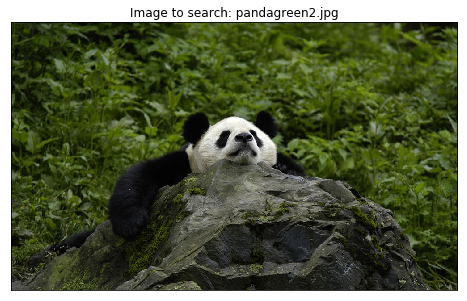

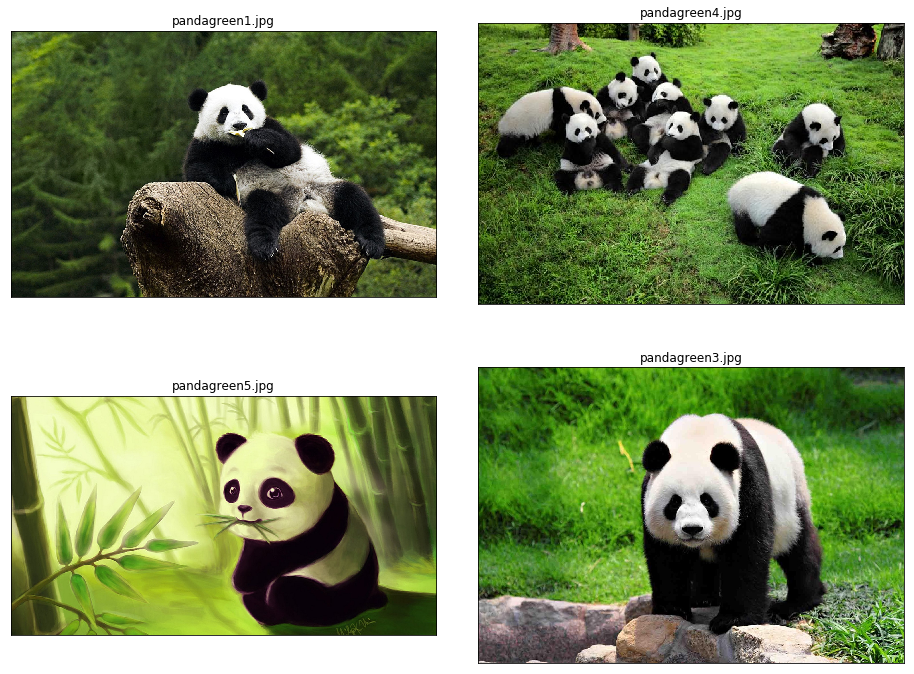

In [122]:
fig1=plt.figure(figsize=(8, 8))
plt.title('Image to search: '+search)
imagepath=workingpath+'\\'+search
img2=cv2.imread(imagepath)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])


fig = plt.figure(figsize=(16,9))
columns = 2
rows = 2

# ax enables access to manipulate each of subplots
ax = []

i=0
plt.subplots_adjust(top = 1.99, bottom=0.91, hspace=0.01, wspace=0.1)
for a,b in result1[:4]:
    imagepath=workingpath+'\\'+b
    img=cv2.imread(imagepath)
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(b)  # set title
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    i=i+1

plt.show()  # finally, render the plot

### Let's create a whole function around this, which intakes image name that we need to search and it will give the above image output:

In [123]:

def find_same(image_name, images):
    search=image_name
    img_search=Searcher(search,images)
    result1=img_search.search()
    
    fig1=plt.figure(figsize=(8, 8))
    plt.title('Image to search: '+search)
    imagepath=workingpath+'\\'+search
    img2=cv2.imread(imagepath)
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])


    fig = plt.figure(figsize=(16,9))
    columns = 2
    rows = 2

    # ax enables access to manipulate each of subplots
    ax = []

    i=0
    plt.subplots_adjust(top = 1.99, bottom=0.91, hspace=0.01, wspace=0.1)
    for a,b in result1[:4]:
        imagepath=workingpath+'\\'+b
        img=cv2.imread(imagepath)
        # create subplot and append to ax
        ax.append(fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title(b)  # set title
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([])
        i=i+1

    plt.show()  # finally, render the plot

### Let's see if this function is working as we desire or not:

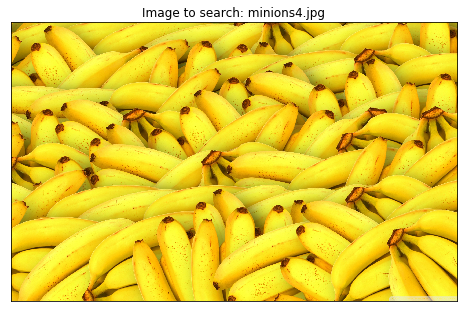

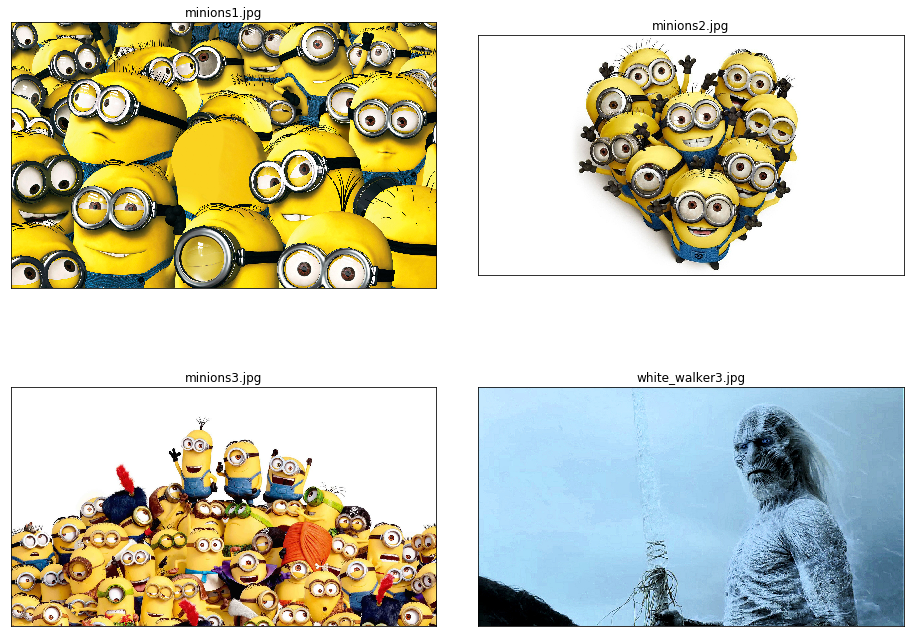

In [127]:
find_same('minions4.jpg',db)

### Well, we see that somehow an White Walker's image is coming while searching for Minions. Why so? Well actually there were only 4 minion images... so obviously some other image had to come rank wise in 4th, pretty obvious. But there can times when that white walker might have been 2nd or even 1st closest image to original. Yeah... it can happen.

### Well, there's nothing wrong with the algorithm above or the code either. There's a specific reason I took images like these. To demonstrate a drawback this method has to find similar images. Let's look few more before I get into the drawback

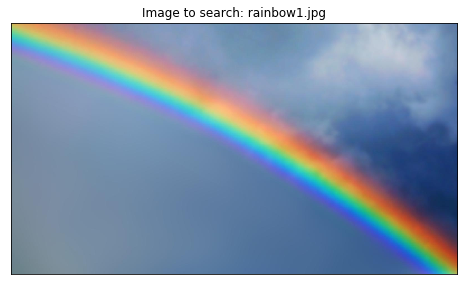

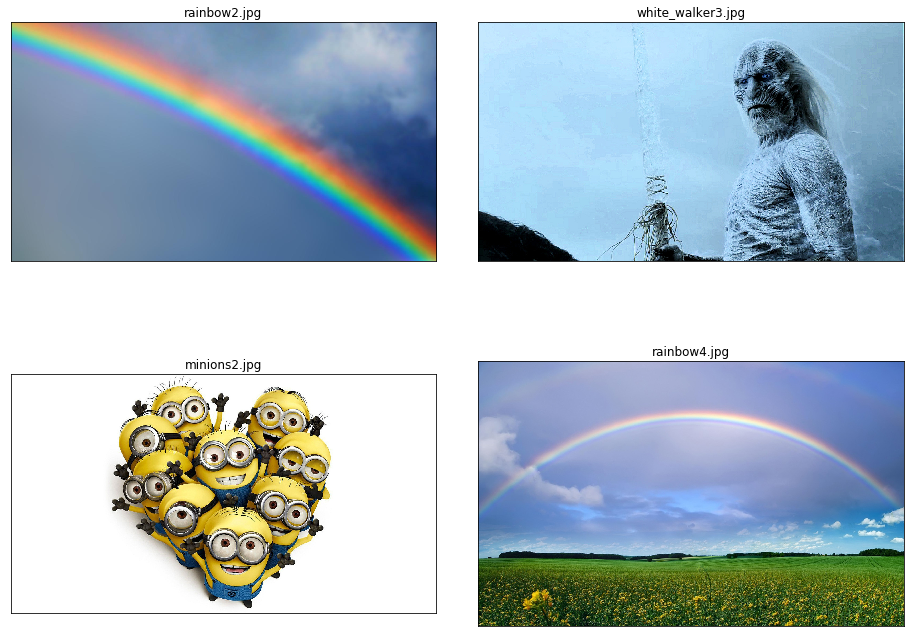

In [128]:
find_same('rainbow1.jpg',db)

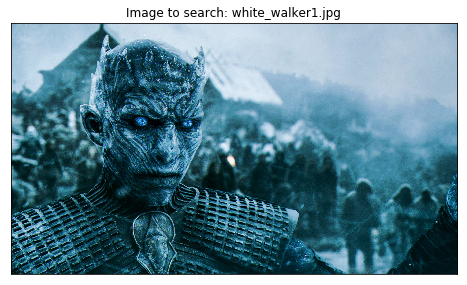

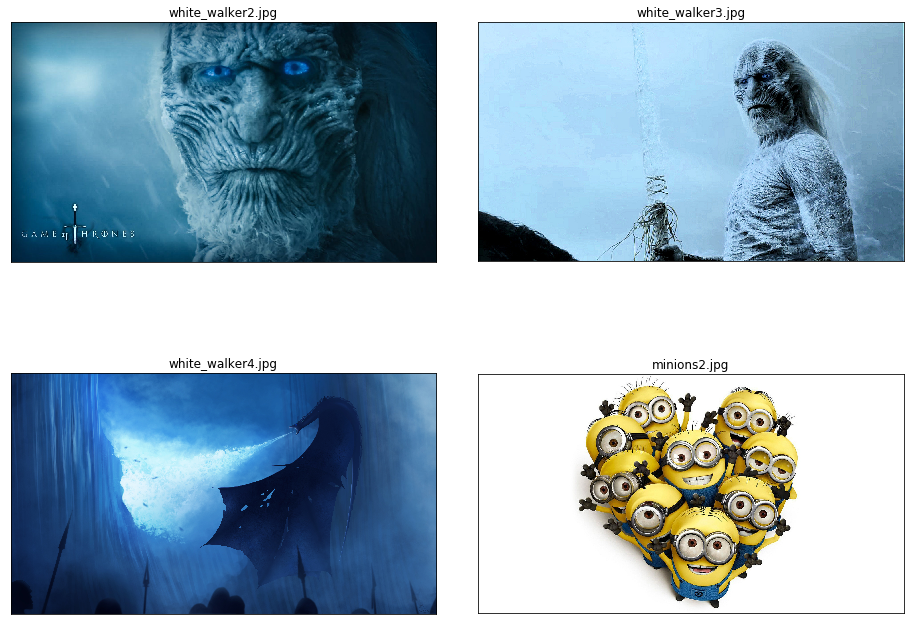

In [130]:
find_same('white_walker1.jpg',db)

### Have you figured out yet?

## The Drawback of Histogram Similarity technique:

We made the assumption that images with similar color distributions are semantically similar. For small, simple datasets, this may in fact be true. However, in practice, this assumption does not always hold.

Let’s think about why is that so...

- For one, color histograms, by definition ignore both the shape and texture of the object(s) in the image. This means that color histograms have no concept of the shape of an object or the texture of the object. Furthermore, histograms also disregard any spatial information (i.e. where in the image the pixel value came from). An extension to the histogram, the color correlogram, can be used to encode a spatial relationship amongst pixels.

- Finally, color histograms are sensitive to “noise”, such as changes in lighting in the environment the image was captured under and quantization errors (selecting which bin to increment). Some of these limitations can potentially be mitigated by using a different color space than RGB (such as HSV or L*a*b*).

### And that's exactly what's going on in above images.

**However, all that said, histograms are still widely used as image descriptors. They are dead simple to implement and very fast to compute. And while they have their limitations, they are very powerful when used correctly and in the right context.**